# Use of graph property 
Finally Using Regularity

meeting 14:
1. cross Plots using 15 nodes, finding regularity and using for testing
2. train wrt one month 
3. cross validate on other months data

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# import networkx as nx
import sklearn
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
# import random
# import scipy.stats as stats
# from scipy.stats import poisson
# from numpy import random
# from numpy import linalg as LA


# Remove Nan Value

In [2]:
data = pd.read_csv('main.csv')
data


,avgDD,avgDIST,maxIndegree,avgAD,Quantile_75,Quantile_90,Regularity
0,9.292588,571.507152,179,2.256177,6.00,34.2,415
1,10.301676,556.680168,167,3.403631,6.00,42.5,376
2,11.908714,579.141079,219,5.207469,6.00,42.0,369
3,11.664134,569.458967,169,4.927052,2.00,47.6,357
4,12.976871,560.994558,192,5.648980,6.00,46.0,373
...,...,...,...,...,...,...,...
9995,9.442120,577.670851,190,2.373780,7.00,41.8,352
9996,8.591940,566.531486,206,1.062972,3.00,32.0,425
9997,12.935262,560.387052,204,5.900826,7.00,49.5,353
9998,10.289548,559.885593,182,3.519774,6.00,35.3,387


In [3]:
print(data.columns)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')


Index(['avgDD', 'avgDIST', 'maxIndegree', 'avgAD', 'Quantile_75',
       'Quantile_90', 'Regularity'],
      dtype='object')


,avgDD,avgDIST,maxIndegree,avgAD,Quantile_75,Quantile_90,Regularity
avgDD,1.000000,0.039157,-0.069628,0.945256,0.487892,0.688533,0.028210
avgDIST,0.039157,1.000000,-0.046245,0.005824,0.036027,0.042686,-0.132592
maxIndegree,-0.069628,-0.046245,1.000000,-0.071875,-0.070463,-0.082589,0.209821
avgAD,0.945256,0.005824,-0.071875,1.000000,0.603138,0.726938,0.042907
Quantile_75,0.487892,0.036027,-0.070463,0.603138,1.000000,0.563815,0.027227
Quantile_90,0.688533,0.042686,-0.082589,0.726938,0.563815,1.000000,0.026150
Regularity,0.028210,-0.132592,0.209821,0.042907,0.027227,0.026150,1.000000


In [4]:

# train_dataset = X_train.copy()
# train_dataset.insert(0, "avgAD", Y_train)
# _ = sns.pairplot(data, kind="reg", diag_kind="kde") # <---------------
# data.head()


In [5]:
#plot color scaled correlation matrix
print(data.columns)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

Index(['avgDD', 'avgDIST', 'maxIndegree', 'avgAD', 'Quantile_75',
       'Quantile_90', 'Regularity'],
      dtype='object')


,avgDD,avgDIST,maxIndegree,avgAD,Quantile_75,Quantile_90,Regularity
avgDD,1.000000,0.039157,-0.069628,0.945256,0.487892,0.688533,0.028210
avgDIST,0.039157,1.000000,-0.046245,0.005824,0.036027,0.042686,-0.132592
maxIndegree,-0.069628,-0.046245,1.000000,-0.071875,-0.070463,-0.082589,0.209821
avgAD,0.945256,0.005824,-0.071875,1.000000,0.603138,0.726938,0.042907
Quantile_75,0.487892,0.036027,-0.070463,0.603138,1.000000,0.563815,0.027227
Quantile_90,0.688533,0.042686,-0.082589,0.726938,0.563815,1.000000,0.026150
Regularity,0.028210,-0.132592,0.209821,0.042907,0.027227,0.026150,1.000000


In [6]:
data.head()

,avgDD,avgDIST,maxIndegree,avgAD,Quantile_75,Quantile_90,Regularity
0,9.292588,571.507152,179,2.256177,6.0,34.2,415
1,10.301676,556.680168,167,3.403631,6.0,42.5,376
2,11.908714,579.141079,219,5.207469,6.0,42.0,369
3,11.664134,569.458967,169,4.927052,2.0,47.6,357
4,12.976871,560.994558,192,5.648980,6.0,46.0,373


# Model Training

In [7]:
from sklearn import linear_model

reg2 = linear_model.LinearRegression()
reg2.fit(data[['avgDD', 'avgDIST']], data.Quantile_75)

LinearRegression()

In [8]:
print('RegCoefficient:\n', reg2.coef_)
a1 = reg2.coef_[0]
a2 = reg2.coef_[1]
k = reg2.intercept_
print('intercept:\n', reg2.intercept_)
# print(reg.predict([[-6, 223]]))
print(k.dtype)


RegCoefficient:
 [0.49243749 0.00319122]
intercept:
 -0.7099214606662061
float64


In [9]:

X1 = data.filter(['avgDD', 'avgDIST'], axis=1)
Y1 = data.filter(['Quantile_75'])


In [10]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X1, Y1, test_size=0.33, random_state=5)
Y_pred = reg2.predict(X_test)
print('Median Absolute Error  : ', median_absolute_error(Y_test, Y_pred))
print('Mean Squared Error     :', mean_squared_error(Y_test, Y_pred))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))

print('Root Mean Squared Error:', rmse)
# print('R2 square: ', r2_score(Y_test, Y_pred))


Median Absolute Error  :  0.9344684636692904
Mean Squared Error     : 1.9810411644296713
Root Mean Squared Error: 1.4074946409950098


In [50]:

Y_test2 = np.array(Y_test)
Y_test2 = Y_test2.flatten()


In [51]:
# Residual error:
err1 = Y_pred - Y_test2
# print(err1)


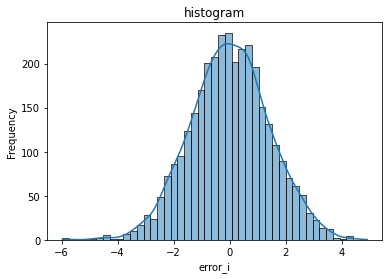

In [62]:
from matplotlib import pyplot as plt
# import numpy as np

# plt.hist(err1)


sns.histplot(data=None, x=err1, binwidth=None, kde=True)

plt.title("histogram")
plt.ylabel("Frequency")
plt.xlabel("error_i")
plt.show()


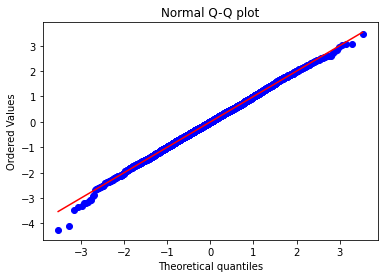

In [53]:
# import numpy as np
import statsmodels.api as sm
import pylab as py

# standardize the observation
z = (err1-np.mean(err1))/np.std(err1)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.xlabel("")
plt.title("")
plt.show()


# Three Variable

summary:

In [54]:
import sklearn
from sklearn.model_selection import train_test_split

print(X1.shape)
print(Y1.shape)
print(type(X1))
sm_reg1 = sm.OLS(Y1, X1).fit()
print("avgDD, avgDist, maxIndegree")
print(sm_reg1.summary())


(10000, 3)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>
avgDD, avgDist, maxIndegree
                                 OLS Regression Results                                
Dep. Variable:            Quantile_75   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          5.948e+04
Date:                Tue, 15 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:44:29   Log-Likelihood:                         -17635.
No. Observations:               10000   AIC:                                  3.528e+04
Df Residuals:                    9997   BIC:                                  3.530e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std er